# Titanic Project

This project is on [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).

We'll be trying to predict a classification- survival or deceased.

We'll use a "semi-cleaned" version of the titanic data set and we use **Logistic Regression method and Decision Tree.**

## Import Libraries
Let's import some libraries to get started!

In [440]:
import pandas as pd
import numpy as np

In [441]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [442]:
matplotlib.rcParams['font.family'] = 'serif'

In [443]:
train = pd.read_csv('titanic_train.csv')

In [444]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [445]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We have 12 columns, passenger ID, survived (0: not survived, 1: survived), class (1st 2nd 3rd class), Name of the passenger, gender, age, SibSp (number of sibling/spouses aboard), Parch (number of parents/children aboard), Ticket number, Fare, Cabin (number of cabin), Embarked (port of embarkation).

In [446]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


if the value is null the bullian value will be true. We can make a heatmap for visualization:

<AxesSubplot:>

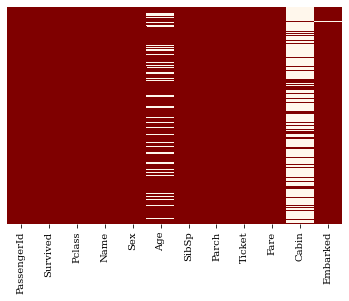

In [447]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='OrRd_r')

Roughly 20 percent of the **Age** data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the **Cabin** column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data!

/Users/saraghotb/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



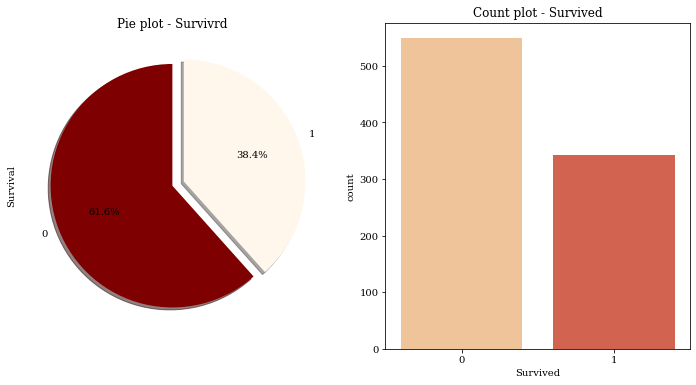

In [448]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, startangle=90,colormap='OrRd_r')
sns.countplot('Survived', data=train, ax=ax[1], palette='OrRd')
ax[0].set_title('Pie plot - Survivrd')
ax[1].set_title('Count plot - Survived')
ax[0].set_ylabel('Survival')
plt.show()

In [449]:
# sns.set_style('whitegrid')
# sns.countplot(x='Survived', data=train, palette='RdBu_r')

### Survival based on sex

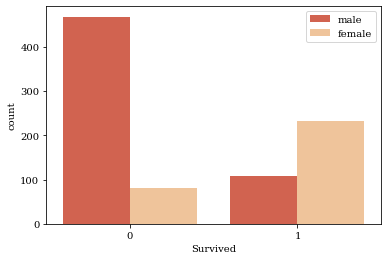

In [450]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='OrRd_r')
plt.legend(loc='upper right')

### Survival based on Pclass

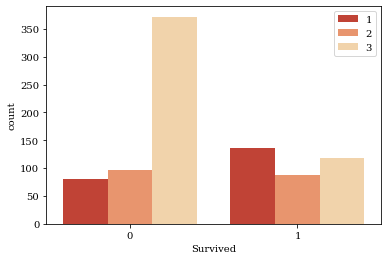

In [451]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='OrRd_r')
plt.legend(loc='upper right')

It seems the majority of not survived are from third class! and most of survived ones are from first class.

### Survival based on Parch

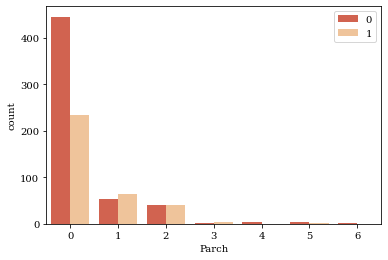

In [452]:
sns.countplot(x='Parch',hue='Survived', data=train, palette='OrRd_r')
plt.legend(loc='upper right')

### Age Distribution

<AxesSubplot:>

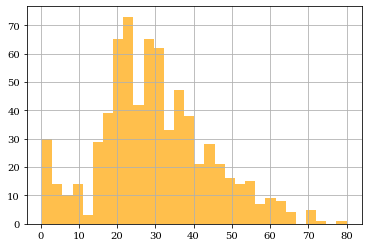

In [453]:
# sns.distplot(train['Age'].dropna(),kde=False, bins=30, color='darkred')
train['Age'].hist(bins=30,color='orange',alpha=0.7)

### Survival based on Age Distribution 

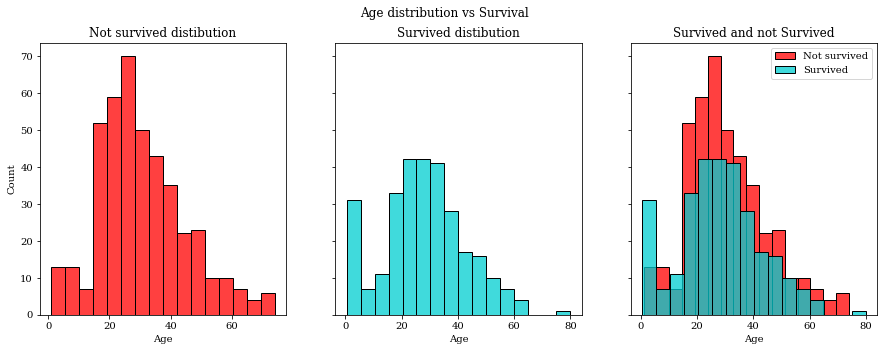

In [454]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Age distribution vs Survival')

sns.histplot(train[train['Survived']==0]['Age'], ax=axes[0], color='red')
axes[0].set_title('Not survived distibution')

sns.histplot(train[train['Survived']==1]['Age'], ax=axes[1], color='darkturquoise')
axes[1].set_title('Survived distibution')

sns.histplot(train[train['Survived']==0]['Age'], ax=axes[2], label ='Not survived', color='red')
sns.histplot(train[train['Survived']==1]['Age'], ax=axes[2], label ='Survived', color='darkturquoise')
axes[2].set_title('Survived and not Survived')
plt.legend()

In [455]:
# train.info()

### SibSp

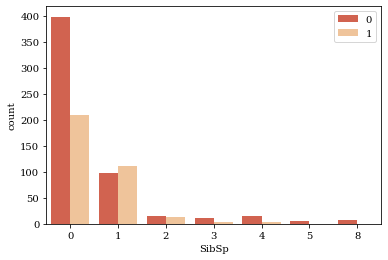

In [456]:
sns.countplot(x='SibSp',hue='Survived', data=train, palette='OrRd_r')
plt.legend(loc='upper right')

Most of people on board didn't have any children or spouse.

Now let's look at fair columns:

### Fare

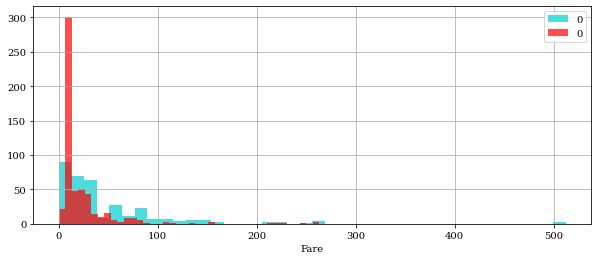

In [457]:
train[train['Survived'] == 1]['Fare'].hist(bins=40,color='darkturquoise',alpha=0.7, figsize=(10,4),label=0)
train[train['Survived'] == 0]['Fare'].hist(bins=40,color='red',alpha=0.7, figsize=(10,4),label=0)
plt.xlabel('Fare')
plt.legend()

### Parch

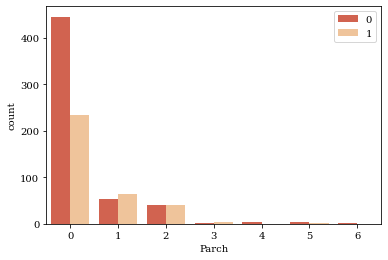

In [458]:
sns.countplot(x='Parch',hue='Survived', data=train, palette='OrRd_r')
plt.legend(loc='upper right')

### Embarked

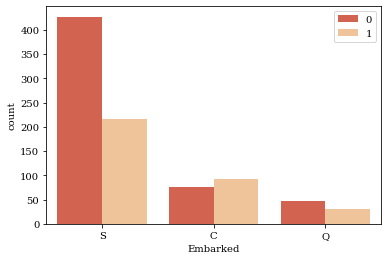

In [459]:
sns.countplot(x="Embarked", hue="Survived", data=train,palette='OrRd_r' )
plt.legend(loc='upper right')

Let's look at the violinplot for survival based on sex.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

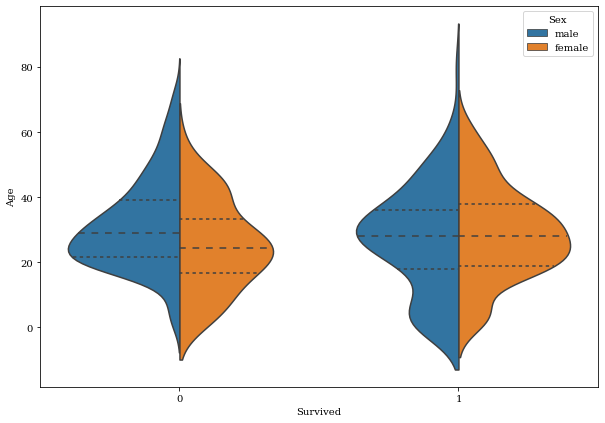

In [409]:
plt.figure(figsize=(10,7))
sns.violinplot(data=train, x='Survived', y='Age', hue='Sex', split=True, inner='quartile',colormap='OrRd_r')

Let's turn these plots into interactive plots using **cufflinks**!

In [410]:
import cufflinks as cf

In [411]:
cf.go_offline()

In [412]:
train['Fare'].iplot(kind='hist',bins=50, colorscale='rdylbu')

In [413]:
train['Age'].iplot(kind='hist',bins=50, colorscale='rdylbu')

# Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

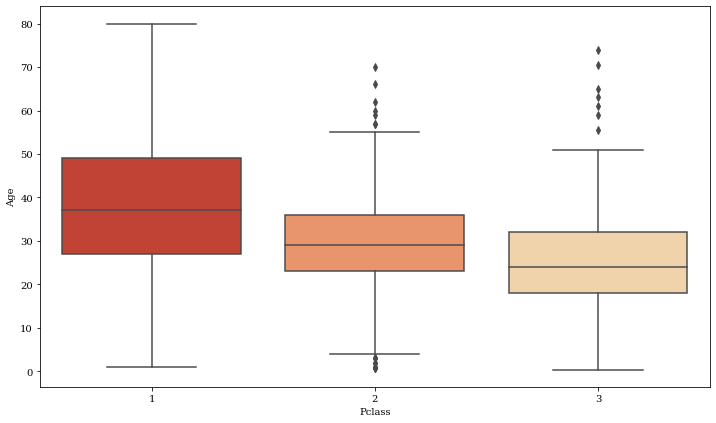

In [414]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train, palette='OrRd_r')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [415]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [416]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

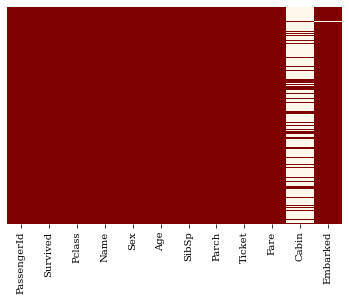

In [417]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='OrRd_r')

Now we see that we successfully filled the age columns based on class columns. However cabin column has so many missing values that it can be dropped.

In [418]:
train.drop('Cabin',axis=1,inplace=True)

In [419]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


So we don't have Cabine column anymore. Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [420]:
train.dropna(inplace=True)

In [421]:
# sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [422]:
sex = pd.get_dummies(train['Sex'],drop_first=True) #To drop values that can predicted by other column# 

In [423]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [424]:
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [425]:
train = pd.concat([train,sex,embark],axis=1)

In [426]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)

In [427]:
train.drop('PassengerId',axis=1,inplace=True)

In [428]:
train.head(3) #Now this looks perfect for machine learning algoritm#

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1



# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set.

## Train Test Split

In [429]:
X = train.drop('Survived',axis = 1)
y = train['Survived']

In [430]:
from sklearn.model_selection import train_test_split

In [431]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [432]:
from sklearn.linear_model import LogisticRegression

In [433]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [498]:
predictions_Logistic = logmodel.predict(X_test)

## Evaluation

We can check precision,recall,f1-score using classification report!

In [499]:
from sklearn.metrics import classification_report, confusion_matrix

In [565]:
print(confusion_matrix(y_test,predictions_Logistic))

[[150  13]
 [ 32  72]]


In [564]:
print(classification_report(y_test,predictions_Logistic))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.
# Building Random Forest Model

In [549]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [550]:
dtree = RandomForestClassifier(n_estimators=500)

In [551]:
dtree.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

## Prediction and Evaluation

In [552]:
predictions_Tree = dtree.predict(X_test)

In [566]:
print(confusion_matrix(y_test,predictions_Tree))

[[140  23]
 [ 28  76]]


In [567]:
print(classification_report(y_test,predictions_Tree))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       163
           1       0.77      0.73      0.75       104

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.
## Building KNN Model

In [554]:
from sklearn.neighbors import KNeighborsClassifier

In [555]:
knn = KNeighborsClassifier(n_neighbors=1)

In [556]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Predictions and Evaluations
Let's evaluate our KNN model!

In [557]:
predictions_KNN = knn.predict(X_test)

In [558]:
from sklearn.metrics import classification_report,confusion_matrix

In [568]:
print(confusion_matrix(y_test,predictions_KNN))

[[119  44]
 [ 46  58]]


In [569]:
print(classification_report(y_test,predictions_KNN))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       163
           1       0.57      0.56      0.56       104

    accuracy                           0.66       267
   macro avg       0.64      0.64      0.64       267
weighted avg       0.66      0.66      0.66       267



--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--

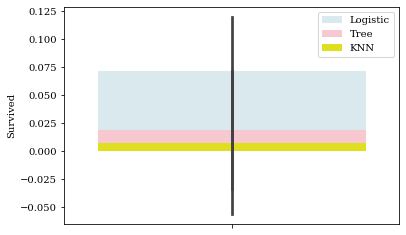

In [593]:
sns.barplot(y=y_test-predictions_Logistic,color='lightblue',alpha=0.5,label='Logistic')

sns.barplot(y=y_test-predictions_Tree,color='pink',label='Tree')

sns.barplot(y=y_test-predictions_KNN,color='yellow',label='KNN')
plt.legend()


----------